In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

In [126]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [127]:
df.shape

(545, 13)

In [128]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [129]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [130]:
cols=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
for i in cols:
    df[i]=df[i].map({'yes':1,'no':0})

In [131]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [132]:
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [133]:
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

# Model fitting

In [134]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
#outliers
def outliers_boxplot(features,target):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.boxplot(y=features)
    plt.subplot(1,2,2)
    sns.boxplot(y=target)
    plt.show()

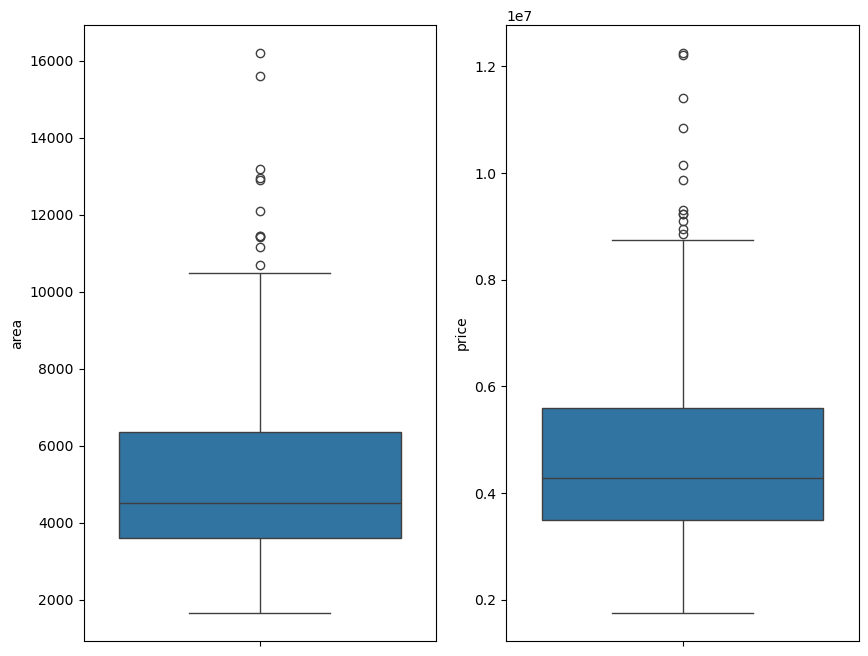

In [136]:
#train
outliers_boxplot(X_train['area'],y_train)

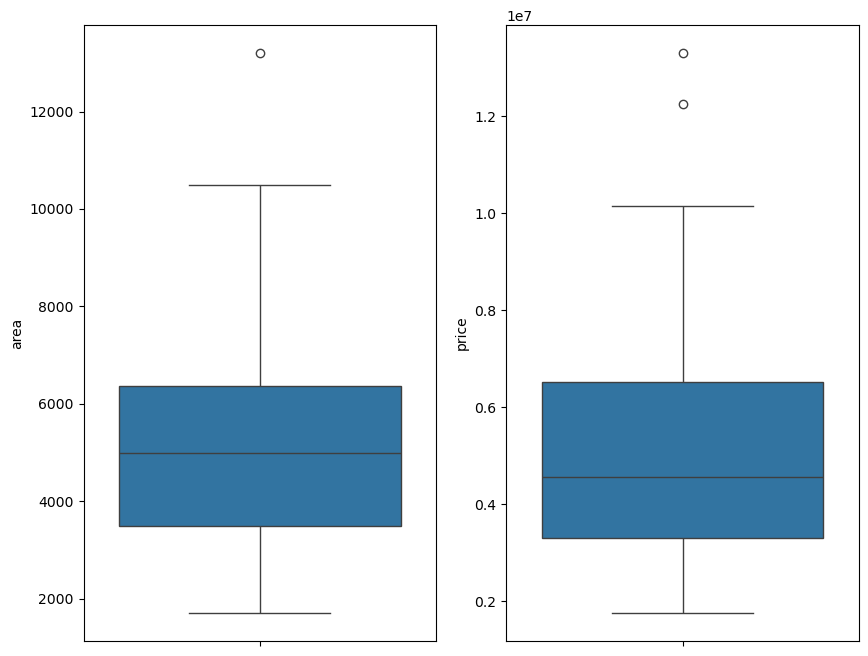

In [137]:
#test
outliers_boxplot(X_test['area'],y_test)

In [138]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()
feature_outliers = count_outliers(X_train['area'])
target_outliers = count_outliers(y_train)
feature_outliers_Test = count_outliers(X_test['area'])
target_outliers_test= count_outliers(y_test)
print('-----------Target---------------')
print(f" Outliers in area: {feature_outliers}")
print(f" Outliers in price: {target_outliers}")
print('-----------Test---------------')
print(f" Outliers in area: {feature_outliers_Test}")
print(f" Outliers in price: {target_outliers_test}")


-----------Target---------------
 Outliers in area: 11
 Outliers in price: 12
-----------Test---------------
 Outliers in area: 1
 Outliers in price: 2


In [139]:
print(X_train.shape)
print(X_test.shape)

(436, 14)
(109, 14)


In [140]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return cleaned_df

In [141]:
# Combine for training set
train_df = X_train.copy()
train_df['price'] = y_train
# Remove outliers 
train_df = remove_outliers_iqr(train_df, 'area')
train_df = remove_outliers_iqr(train_df, 'price')
# Split back into features and target
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']
#  test data
test_df = X_test.copy()
test_df['price'] = y_test
test_df = remove_outliers_iqr(test_df, 'area')
test_df = remove_outliers_iqr(test_df, 'price')
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']


In [142]:
def distribution_plots(features,target):
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    sns.histplot(features['area'], kde=True)
    plt.title(f'Distribution of area')
    plt.subplot(1,2,2)
    sns.histplot(target, kde=True)
    plt.title(f'Distribution of price')
    plt.tight_layout()
    plt.show()

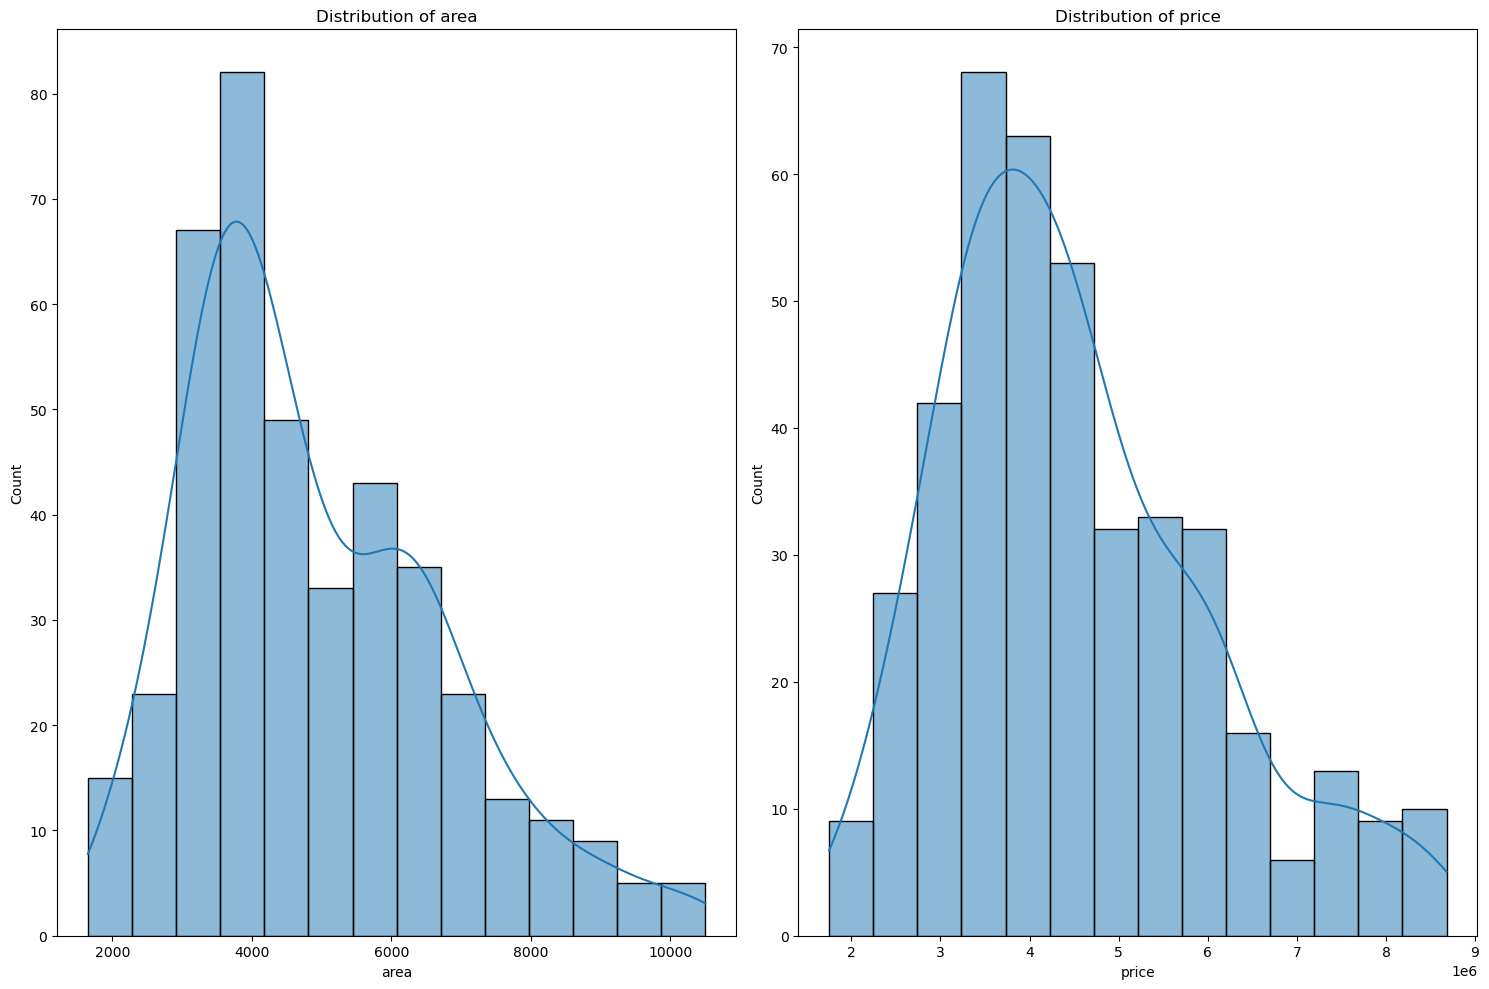

In [143]:
#Train data
distribution_plots(X_train,y_train)

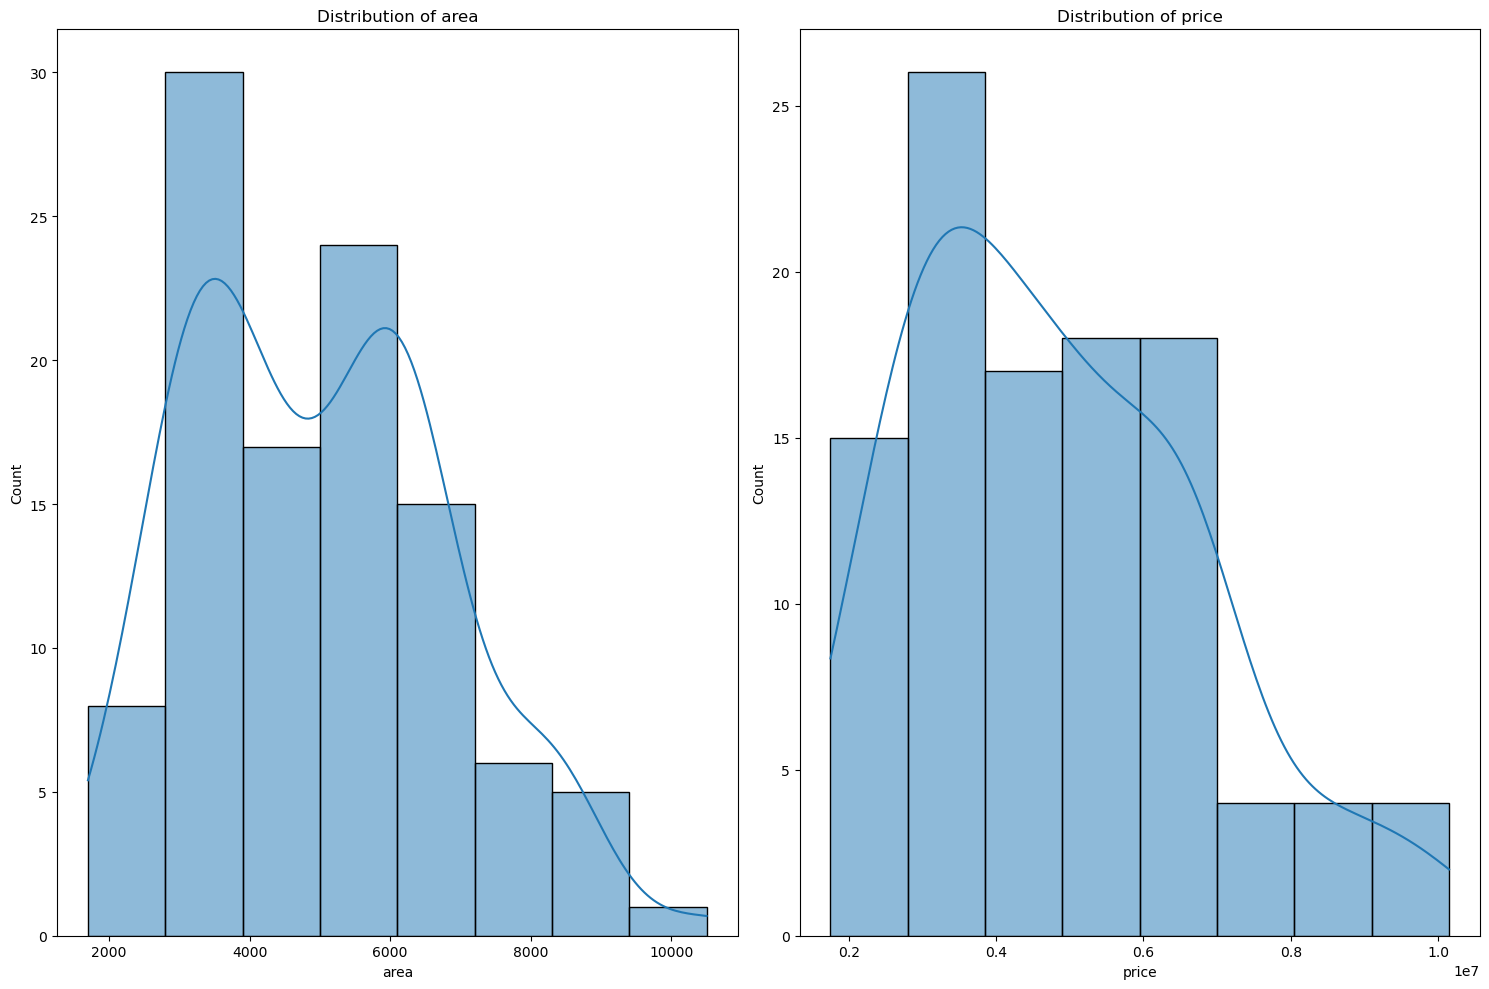

In [144]:
#Test data
distribution_plots(X_test,y_test)

In [145]:
print(X_train['area'].skew())
print(X_test['area'].skew())
print(pd.Series(y_train).skew())
print(pd.Series(y_test).skew())
# print(pd.Series(y_train.flatten()).skew())
# print(pd.Series(y_test.flatten()).skew())


0.799684643639681
0.43978661146343184
0.7616461273070166
0.6414313797979335


In [146]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
pt_Train_X = PowerTransformer(method='yeo-johnson', standardize=True)
X_train['area'] = pt_Train_X.fit_transform(X_train[['area']])
X_test['area'] = pt_Train_X.fit_transform(X_test[['area']])
pt_Train_y = PowerTransformer(method='yeo-johnson', standardize=True)
y_train = pt_Train_y.fit_transform(y_train.values.reshape(-1,1))
y_test = pt_Train_y.fit_transform(y_test.values.reshape(-1,1))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
y_test = y_test.squeeze()
y_train=y_train.squeeze()

In [148]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
y_pred=linear.predict(X_test)

In [150]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R square:',r2_score(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))

R square: 0.5587237012403923
MAE: 0.4874661151969879


In [151]:
X_test.shape

(106, 14)

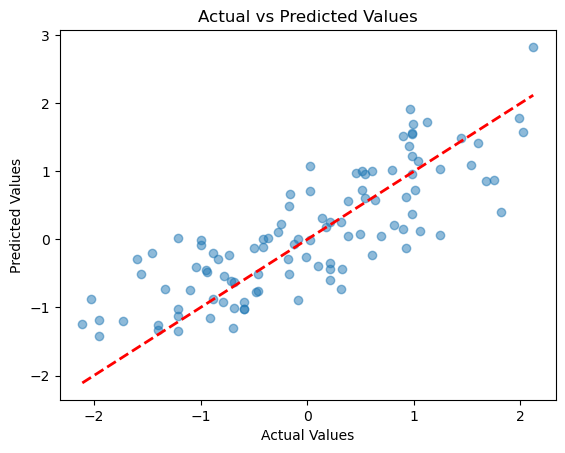

In [152]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.show()